In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from my_classes import DataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.layers import ( Conv2D, Flatten, Lambda, Dense, concatenate,
                         Dropout, Input )
from keras.models import Model
from sklearn.utils import class_weight
#https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly

In [2]:
# Parameters
params = {'dim': (256,256),
          'batch_size': 200,
          'n_classes': 128,
          'n_channels': 1,
          'shuffle': True}
NfilesTraining = 4000
NfilesValidate = 200
# Datasets
pTrain = np.linspace(1, NfilesTraining, NfilesTraining)
pValidate = np.linspace(NfilesTraining+1, NfilesValidate + NfilesTraining, NfilesValidate)
p2 = ["%gTrace" % x for x in pTrain]
p3 = ["%gTrace" % x for x in pValidate]
partition = {'train': p2, 'validation': p3}

lTrain = np.linspace(1, NfilesTraining, NfilesTraining)
lValidate = np.linspace(NfilesTraining+1, NfilesValidate + NfilesTraining, NfilesValidate)
l2 = ["%gLabel" % x for x in lTrain]
l3 = ["%gLabel" % x for x in lValidate]
labels = {'train': l2, 'validation': l3}


# Generators
training_generator = DataGenerator(partition['train'], labels['train'], **params)
validation_generator = DataGenerator(partition['validation'], labels['validation'], **params)







In [6]:
model = tf.keras.models.load_model('C:/Users/RippS/FrogNetwork')


Values bigger than 10 = [0.01190328 0.00192212 0.00281141 ... 0.00222358 0.00502018 0.00372809]
Their indices are  (array([  0,   0,   0, ..., 199, 199, 199], dtype=int64), array([  2,   3,   5, ..., 123, 124, 126], dtype=int64))


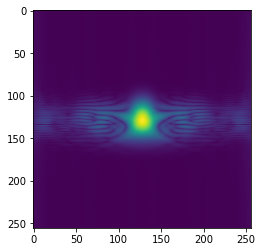

In [48]:
whichToTest=26
[TestTrace, TestLabel] = validation_generator[0]
predicted = model.predict(TestTrace)
plt.imshow(TestTrace[whichToTest,:,:,0])
np.shape(TestTrace[0,:,:,:])
print("Values bigger than 10 =", predicted[predicted>0])
print("Their indices are ", np.nonzero(predicted > 0))
# np.shape(TestLabel[:,:])

(200, 256, 256, 3)


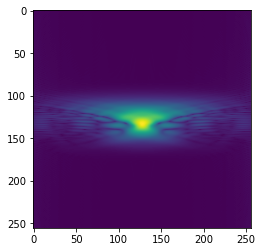

In [108]:
plt.imshow(TestTrace[67,:,:,2])
print(TestTrace.shape)

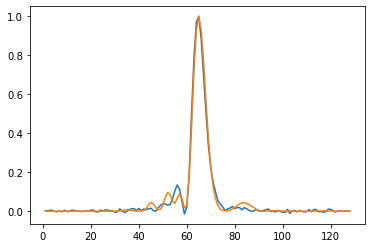

3.2587843
4.1890798


In [155]:
whichToTest=116
x = np.arange(1,129) 
plt.plot(x,np.transpose(predicted[whichToTest,0:128]),x,np.transpose(TestLabel[whichToTest,0:128])) 
plt.show()

print(np.sum(predicted[whichToTest,0:64]))
print(np.sum(predicted[whichToTest,64:128]))
